tensor([0., 0., 0., 0.], grad_fn=<SelectBackward0>)


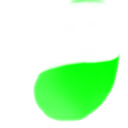

In [4]:
from canvas_env import decode
import torch
from PIL import Image
from IPython.display import display

#                                        size    opacity
# 0-9: stroke - (x0, y0, x1, y1, x2, y2, z0, z2, w0, w2)
# 10-12: color
# 13: erase or draw
# action = [
#     [0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.1, 0.1, 1, 1, 1, 1, 1, 1],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# ]

# action = [
#     #x0      y0      x1      y1      x2      y2      z0      z2      w0      w2      r       g       b       e
#     [0.1245, 0.2214, 0.9806, 0.0046, 0.3897, 0.5949, 0.9824, 0.9176, 0.9531, 0.281,  0.1734, 0.262,  0.3383, 0.3882], 
#     [0.2311, 0.198,  0.9921, 0.0183, 0.7092, 0.6321, 0.9997, 0.995,  0.8789, 0.891,  0.3702, 0.5409, 0.6349, 0.5277], 
#     [0.7939, 0.7529, 0.9986, 0.0014, 0.1917, 0.1801, 0.9995, 0.9996, 0.7777, 0.8363, 0.3012, 0.4603, 0.5175, 0.7585], 
#     [0.0002, 0.5036, 0.0001, 1.0,    0.1475, 0.0002, 0.1721, 0.4497, 0.5822, 0.7441, 0.0175, 0.0351, 0.0147, 0.3743], 
#     [0.982,  0.9701, 0.0018, 0.999,  0.8859, 0.7122, 0.7677, 0.0361, 0.9181, 0.0014, 0.0649, 0.0926, 0.1178, 0.3533]
# ]

action = [
    #x0      y0      x1      y1      x2      y2      z0      z2      w0      w2      r       g       b       e
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    # [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    # [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0.6958, 0.5215, 0.0003, 0.9997, 0.2324, 0.6957, 0.9999, 0.9998, 0.5,    1.0, 0, 1, 0, 0.5994],
    [0.2512, 0.7667, 0.0159, 0.8627, 0.3469, 0.2216, 0.9884, 0.9799, 1.0,    1.0, 1, 0, 0, 0.3029],
    [0.2512, 0.7667, 0.0159, 0.8627, 0.3469, 0.2216, 0.9884, 0.9799, 1.0,    1.0, 1, 0, 0, 0.529]

    # [0.6958, 0.5215, 0.0003, 0.9997, 0.2324, 0.6957, 0.9999, 0.9998, 0.9431, 0.8264, 0.6417, 0.6249, 0.5937, 0.5994],
    # [0.2581, 0.9981, 0.9984, 0.1095, 0.0117, 0.5236, 0.1923, 0.1579, 0.6153, 0.5669, 0.0206, 0.0262, 0.0376, 0.4634],
    # [0.9973, 0.7266, 0.0024, 0.9793, 0.7551, 0.0716, 0.034,  0.8444, 0.1211, 0.9403, 0.0482, 0.0366, 0.0206, 0.38],
    # [0.4472, 0.004,  0.5294, 0.0176, 0.982,  0.6896, 0.4001, 0.1721, 0.149,  0.417,  0.0008, 0.0017, 0.0012, 0.4738],
    # [0.2512, 0.7667, 0.0159, 0.8627, 0.3469, 0.2216, 0.9884, 0.9799, 0.5026, 0.7642, 0.5072, 0.4914, 0.4963, 0.5029]
    
    # [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]



# round up action numbers to 2 decimal places
for i in range(len(action)):
    for j in range(len(action[i])):
        action[i][j] = round(action[i][j], 4)

# print(str(action))

action = torch.tensor(action, dtype=torch.float32)

canvas = torch.zeros(1, 4, 128, 128)

canvas = decode(action, canvas)

# sample color from canvas
print(canvas[0, :, int(0.34 * 128), int(0.22 * 128)])

display(Image.fromarray((canvas[0].permute(1, 2, 0).detach().numpy() * 255).astype('uint8')))